# 🤍**Ghaid Yahya** ***1201220 - Assi No.4***🤍
---

# 🌸 **[The Dataset Description](https://www.kaggle.com/datasets/thespacefreak/taylor-swift-spotify-data?resource=download)**



*The dataset I chose is called "Taylor Swift Spotify Data", it contains information about various songs by the  American artist Taylor Swift. It includes attributes such as the song's name, album, artist, release date, length, popularity, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, valence and tempo.*

# 🌸**The Dictionary Of Columns**
|**Column Name**        | **Data Type** | **Description**                                       |
|--------------------|-----------|---------------------------------------------------|
| name               | String    | Name of the song                                  |
| album              | String    | Name of the album the song belongs to             |
| artist             | String    | Name of the artist                                |
| release_date       | String    | Date when the song was released (YYYY-MM-DD)      |
| length             | Integer   | Length of the song in milliseconds                |
| popularity         | Integer   | Popularity score of the song                      |
| danceability       | Float     | Danceability score of the song (0.0 to 1.0)       |
| acousticness       | Float     | Acousticness score of the song (0.0 to 1.0)       |
| energy             | Float     | Energy score of the song (0.0 to 1.0)             |
| instrumentalness   | Float     | Instrumentalness score of the song (0.0 to 1.0)   |
| liveness           | Float     | Liveness score of the song (0.0 to 1.0)           |
| loudness           | Float     | Loudness of the song in dB                         |
| speechiness        | Float     | Speechiness score of the song (0.0 to 1.0)        |
| valence            | Float     | Valence score of the song (0.0 to 1.0)            |
| tempo              | Float     | Tempo of the song in BPM                           |



---


# **THE CODE 🖥️**


Importing the libraries

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the data from a .cvs file

In [200]:
myFile = "DataSet/spotify_taylorswift.csv"
df = pd.read_csv(myFile)

**1. What is the shape of the data?**
To get the shape of the data we use df.shape as follows:

In [201]:
shape = df.shape
print("The Shape Of The Data Is:", shape)

The Shape Of The Data Is: (171, 16)


**2. Does it contain missing values?**

In [202]:
MissValues = df.isnull().sum()

# if the sum of the missing values is 0 then we dont have any missing values
if MissValues.sum() == 0:
    print("There is NO missing values :)")

  # otherwise we do have
else:
    print("There IS missing values :(")

    # if there is missing values print them
    print("The Number Of Missing Values In Each Column Is :")
    print(MissValues)

There is NO missing values :)


**3. Which features are numerical, and which are nominal, and which are ordinal?**

▶  1.   **Numerical features:**
*   *Length*
*   *Popularity*
*  *Danceability*
*  *Acousticness*
*  *Energy*
*  *Instrumentalness*
* *Liveness*
* *Loudness*
* *Speechiness*
* *Valence*
* *Tempo*



▶ 2.   **Nominal features:**
*   *Name*
*   *Album*
*   *Artist*
*   *Release Date*

▶ 3.   **Ordinal features:**
  * **NONE**: *the data set I'm using doesn't have any ordinal features, but if the popularity was measured from "High" to "Low" it would be ordinal.*

**4. Select two numerical features** (I chose *popularity* and *acousticness*)

In [203]:
sNumfeatures = ['popularity', 'acousticness']

**5. Show their descriptive statistics, add your interpretation on each feature** *we use the .describe as follows :*

In [204]:
Dstats = df[sNumfeatures].describe()
print("The Descriptive Statistics:")
print(Dstats)


The Descriptive Statistics:
       popularity  acousticness
count  171.000000    171.000000
mean    61.228070      0.321634
std     11.904548      0.334019
min      0.000000      0.000191
25%     58.000000      0.030450
50%     63.000000      0.156000
75%     67.000000      0.674000
max     82.000000      0.971000



- **Popularity:**
  - Descriptive Statistics:
    - Mean popularity score is approximately 61.23.
    - The standard deviation is approximately 11.90, indicating a relatively wide spread of popularity scores around the mean.
    - The minimum popularity score is 0, and the maximum popularity score is 82.
    - The median (50th percentile) popularity score is 63, which is close to the mean.
    - The interquartile range (IQR) is relatively small, suggesting that most songs have popularity scores clustered around the median.
  

- **Acousticness:**
  - Descriptive Statistics:
    - Mean acousticness score is approximately 0.322.
    - The standard deviation is approximately 0.334, indicating a relatively wide spread of acousticness scores around the mean.
    - The minimum acousticness score is 0.000191, and the maximum acousticness score is 0.971.
    - The median (50th percentile) acousticness score is 0.156, which is lower than the mean.
    - The interquartile range (IQR) is relatively large, suggesting variability in the acousticness scores.
  


**6. Does they have skweness? interpret**

In [205]:
# skewness
selected_skewness = df[sNumfeatures].skew()

print("\nSkewness:")
print(selected_skewness)


Skewness:
popularity     -2.375715
acousticness    0.634817
dtype: float64


- acousticness:
    - The skewness value is approximately 0.6348, indicating a right-skewed distribution. This suggests that there may be a higher concentration of songs with lower acousticness values compared to those with higher acousticness values.

- Popularity
 - The skewness value is approximately -2.38, indicating a left-skewed distribution. This suggests that there are more songs with higher popularity scores and fewer songs with lower popularity scores.

**7. Select two categorical features and verify if the data is balanced between the categories of each feature**

In [206]:
# the 2 categorical features i chose are the album and the artist
catFeatures = ['album', 'artist']

to check the frequency in each category within each feature

In [207]:

catCount = {}
for feature in catFeatures:
    catCount[feature] = df[feature].value_counts()

# Print frequency count of each category within each feature
for feature, counts in catCount.items():
    print(f"\nFreq count of the category in {feature}:")
    print(counts)



Freq count of the category in album:
Fearless (Taylor's Version)    26
Speak Now (Deluxe Package)     22
Red (Deluxe Edition)           22
1989 (Deluxe)                  19
Lover                          18
folklore (deluxe version)      17
evermore (deluxe version)      17
Taylor Swift                   15
reputation                     15
Name: album, dtype: int64

Freq count of the category in artist:
Taylor Swift    171
Name: artist, dtype: int64


to check the balance

In [208]:
for feature, counts in catCount.items():
    print(f"\nCheck The Balance For {feature} feature:")
    print("Balanced :)" if counts.min() / counts.max() >= 0.8 else "NOT Balanced :(")



Check The Balance For album feature:
NOT Balanced :(

Check The Balance For artist feature:
Balanced :)


**8. Based on your intuition, select two features that you think they could be correlated. Verify your assumption using both visualization and the correlation coefficient approaches**

In [209]:
# the features I chose:
ChosenFeat = ['danceability', 'popularity']

Visualizing the relationship I assumed using the sns and plt

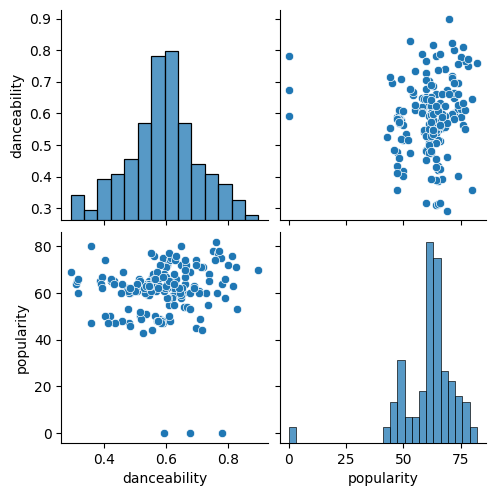

In [210]:
sns.pairplot(df[ChosenFeat])
plt.show()

The Correlation Coefficient

In [211]:
# calculating the correlation coefficient between the features
correlation_coefficient = df[ChosenFeat].corr().iloc[0, 1]
print("Correlation Coefficient between 'danceability' and 'popularity':", correlation_coefficient)

Correlation Coefficient between 'danceability' and 'popularity': 0.07262172735707048


the correlation coefficient is positive, indicating a slightly positive linear relationship between 'danceability' and 'popularity'. However, the correlation is very weak.

**9. Are their features that can be used as index?**

checking the uniqueness for the first column

In [212]:
uniqINDEX = df.index.is_unique
print("Is The First Column In The DataSet A Unique Index?")
if uniqINDEX:
    print("Yes it is :)")
else:
    print("No it isn't :(")

Is The First Column In The DataSet A Unique Index?
Yes it is :)


**As a fan who knows about every single line in this dataset i can tell that the statistics are right 😊**
praying for a full mark🤲